# 시각화 3 - 주석, 지도

In [1]:
import pandas as pd
import os

path = 'D:\\elice_python\\GAS_5\\pytest_python\\'

In [2]:
os.chdir(path)

In [3]:
! cd

D:\elice_python\GAS_5\pytest_python


### 한글 폰트 사용하기
- 컴퓨터가 가지고 있는 한글 폰트 경로를 알려주어 사용하게 한다
- C:/Windows/Fonts 에 있는 폰트의 속성을 통해 폰트명을 찾는다
- 기본적으로 True Type Font(.ttf)를 사용한다
- True Type Font라도 일부 폰트는 적용되지 않는 경우가 있다

In [17]:
import matplotlib
import matplotlib.font_manager as fm

font_location = 'C:/Windows/Fonts/Malgun.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

path = 'D:\\elice_python\\GAS_5\\pytest_python\\'

df = pd.read_csv(os.path.join(path, '북한발전전력량.csv'), encoding='CP949')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   연도      27 non-null     int64
 1   합계      27 non-null     int64
 2   수력      27 non-null     int64
 3   화력      27 non-null     int64
dtypes: int64(4)
memory usage: 992.0 bytes


In [25]:
df.head()

,연도,합계,수력,화력
0,1990,277,156,121
1,1991,263,150,113
2,1992,247,142,105
3,1993,221,133,88
4,1994,231,138,93


In [26]:
df = df.rename(columns={'합계':'총발전량'})
df.head()

,연도,총발전량,수력,화력
0,1990,277,156,121
1,1991,263,150,113
2,1992,247,142,105
3,1993,221,133,88
4,1994,231,138,93


In [27]:
df.sort_values('연도')
df['직전년도_총발전량'] = df['총발전량'].shift(1) # 이를 적용하려면 연도순으로 정렬되어 있어야 한다.
df.head()

,연도,총발전량,수력,화력,직전년도_총발전량
0,1990,277,156,121,NaN
1,1991,263,150,113,277.0
2,1992,247,142,105,263.0
3,1993,221,133,88,247.0
4,1994,231,138,93,221.0


In [28]:
# df.fillna(0, inplace=True)
# df.head()

In [29]:
# 전년도 대비 변동율을 계산. ((final_value - initial_value)/initial_value) *100
df['증감률'] = ((df.총발전량 - df.직전년도_총발전량)/df.직전년도_총발전량)*100
df.head()

,연도,총발전량,수력,화력,직전년도_총발전량,증감률
0,1990,277,156,121,NaN,NaN
1,1991,263,150,113,277.0,-5.054152
2,1992,247,142,105,263.0,-6.083650
3,1993,221,133,88,247.0,-10.526316
4,1994,231,138,93,221.0,4.524887


변동율 : 어떤 값에서 시작해서 다른 값으로 얼마나 변했는지를 백분율로 표현한 값

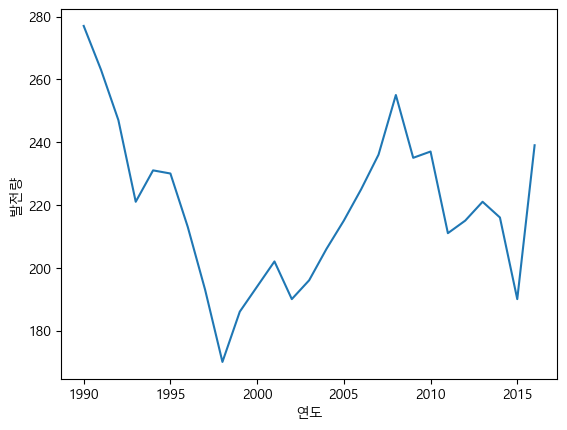

In [30]:
# 연간 총발전량
plt.plot(df.연도, df.총발전량)
plt.xlabel('연도')
plt.ylabel('발전량')
plt.show()

### 총발전량을 주석으로 붙이기 1

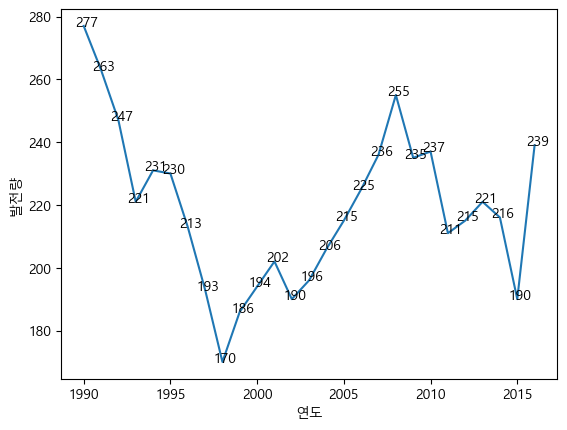

In [34]:
plt.plot(df.연도, df.총발전량)
plt.xlabel('연도')
plt.ylabel('발전량')

for idx, amount in enumerate(df.총발전량):
    plt.annotate(amount, (df.연도[idx]-0.5, amount))    #(주석내용, (x좌표, y좌표))
    
plt.show()

### 총발전량을 주석으로 붙이기 2

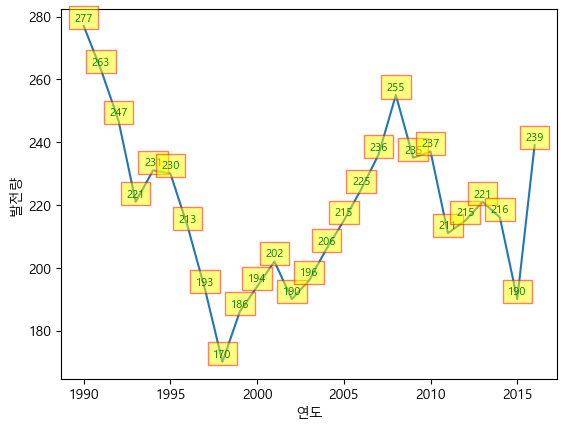

In [39]:
plt.plot(df.연도, df.총발전량)
plt.xlabel('연도')
plt.ylabel('발전량')

for idx, amount in enumerate(df.총발전량):
    plt.annotate(amount, (df.연도[idx], amount),    # 주석내용, (x좌표, y좌표)
                 textcoords='offset pixels',    # 텍스트 좌표 단위 offset pixels | offset points
                 xytext=(0, 5),    # 픽셀 단위로 x는 0만큼, y는 5만큼 떨어진 곳에 위치.
                 ha='center',    # horizontal align = center
                 color='g',
                 fontsize=8,
                 bbox=dict(facecolor='yellow', alpha=0.5, edgecolor='red'))    
    
plt.show()

### 막대그래프와 주석
같은 방식으로 막대그래프에도 주석을 붙일 수 있다.


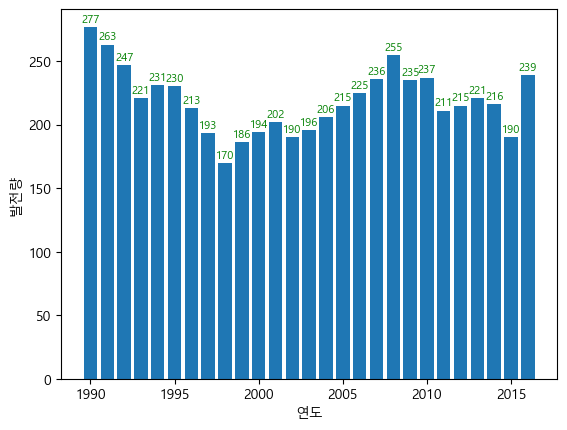

In [41]:
plt.bar(df.연도, df.총발전량)
plt.xlabel('연도')
plt.ylabel('발전량')

for idx, amount in enumerate(df.총발전량):
    plt.annotate(amount, (df.연도[idx], amount),    # 주석내용, (x좌표, y좌표)
                 textcoords='offset pixels',    # 텍스트 좌표 단위 offset pixels | offset points
                 xytext=(0, 5),    # 픽셀 단위로 x는 0만큼, y는 5만큼 떨어진 곳에 위치.
                 ha='center',    # horizontal align = center
                 color='g',
                 fontsize=8,
                #  bbox=dict(facecolor='yellow', alpha=0.5, edgecolor='red')
                 )    
    
plt.show()

### 가로 막대그래프와 주석
- barh()로 가로 막대그래프를 그릴 수 있다.
- x, y 정보의 순서에 유의한다.
- 주석의 좌표도 적절히 조절해야함!

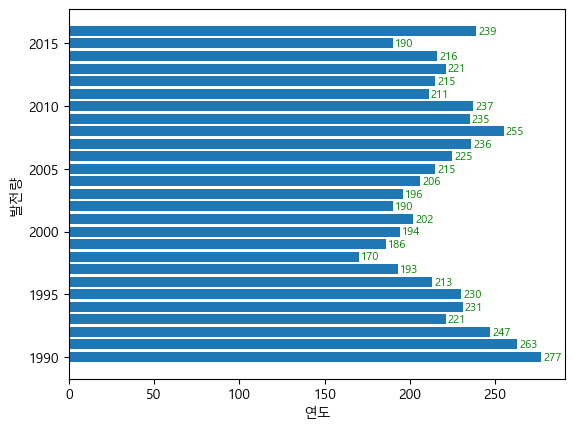

In [52]:
plt.barh(df.연도, df.총발전량)
plt.xlabel('연도')
plt.ylabel('발전량')

for idx, amount in enumerate(df.총발전량):
    plt.annotate(amount, (amount,df.연도[idx]),    # 주석내용, (x, y가 반대가 된다.)
                 textcoords='offset pixels',    # 텍스트 좌표 단위 offset pixels | offset points
                 xytext=(2, 0),    
                 ha='left',    # horizontal align = center
                 va='center',
                 color='g',
                 fontsize=8,
                #  bbox=dict(facecolor='yellow', alpha=0.5, edgecolor='red')
                 )    
    
plt.show()

## 2축 그래프 그리기
- 이제까지는 Y축이 하나인 그래프였다
- 여기서는 df.plot()을 이용하여
- 2개의 Y축을 갖는 그래프를 그리는 방법을 알아본다

### 인덱스 변경
- 그래프의 X 축에 들어갈 내용을 인덱스로 설정한다.

In [53]:
df = df.set_index('연도')
df.head()

,총발전량,수력,화력,직전년도_총발전량,증감률
연도,,,,,
1990,277,156,121,NaN,NaN
1991,263,150,113,277.0,-5.054152
1992,247,142,105,263.0,-6.083650
1993,221,133,88,247.0,-10.526316
1994,231,138,93,221.0,4.524887


### 발전량 막대 그래프
- 수력과 화력의 두 개의 막대 그래프를 겹쳐서 그린다.
- df.plot()은 kind 파라미터로 간단히 그래프를 그릴 수 있다.
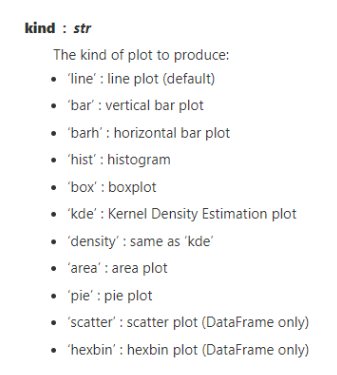

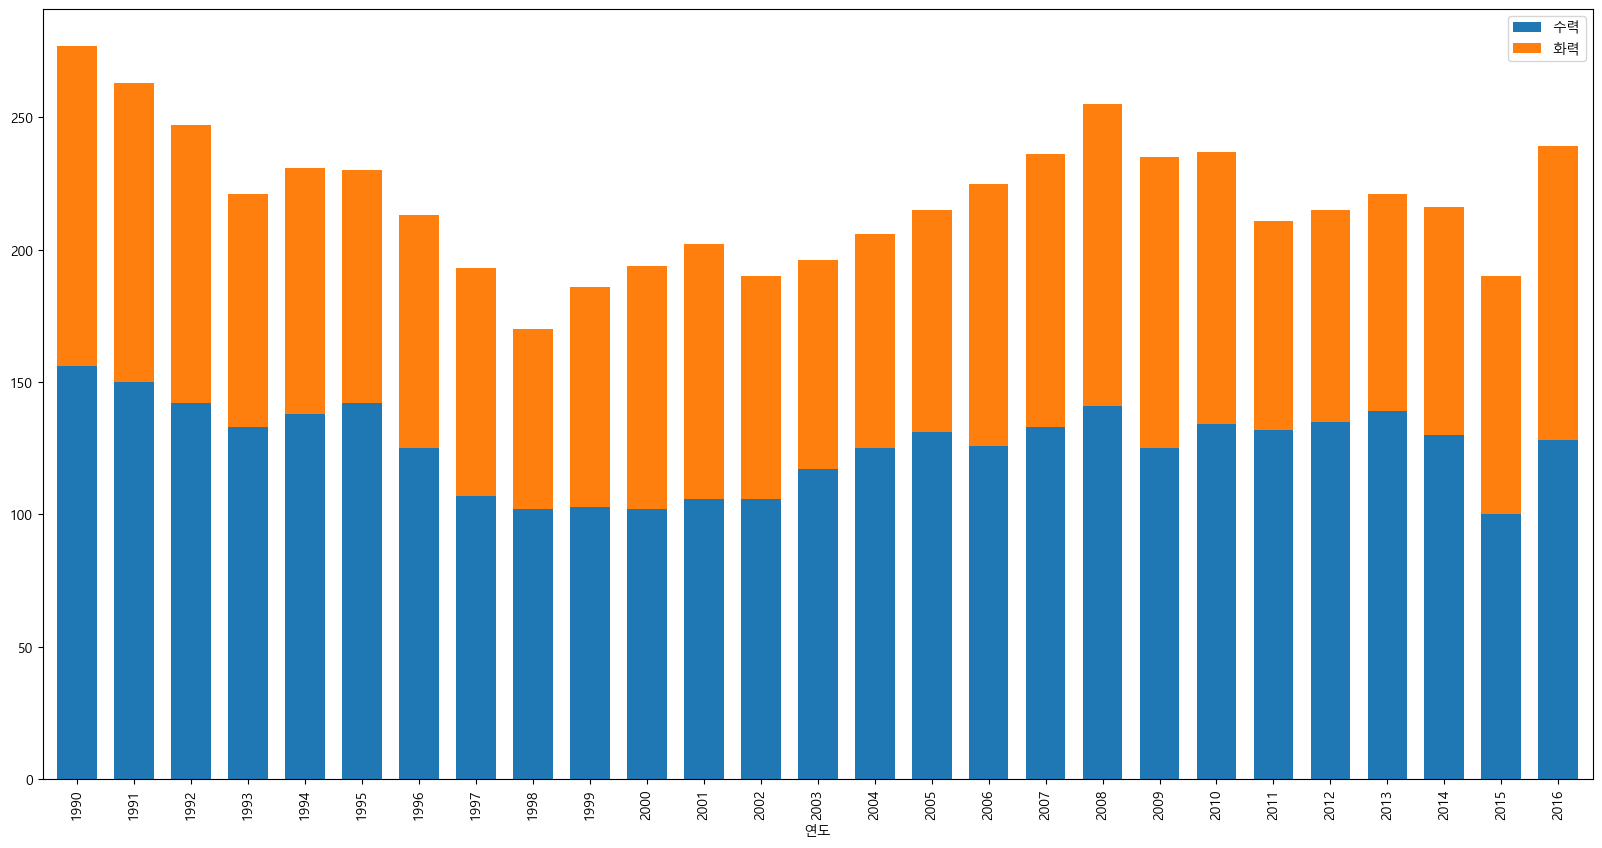

In [56]:
# stacked=True
df[['수력','화력']].plot(kind='bar', figsize=(20,10), width=0.7, stacked=True)

plt.show()

### 변동율 막대 그래프

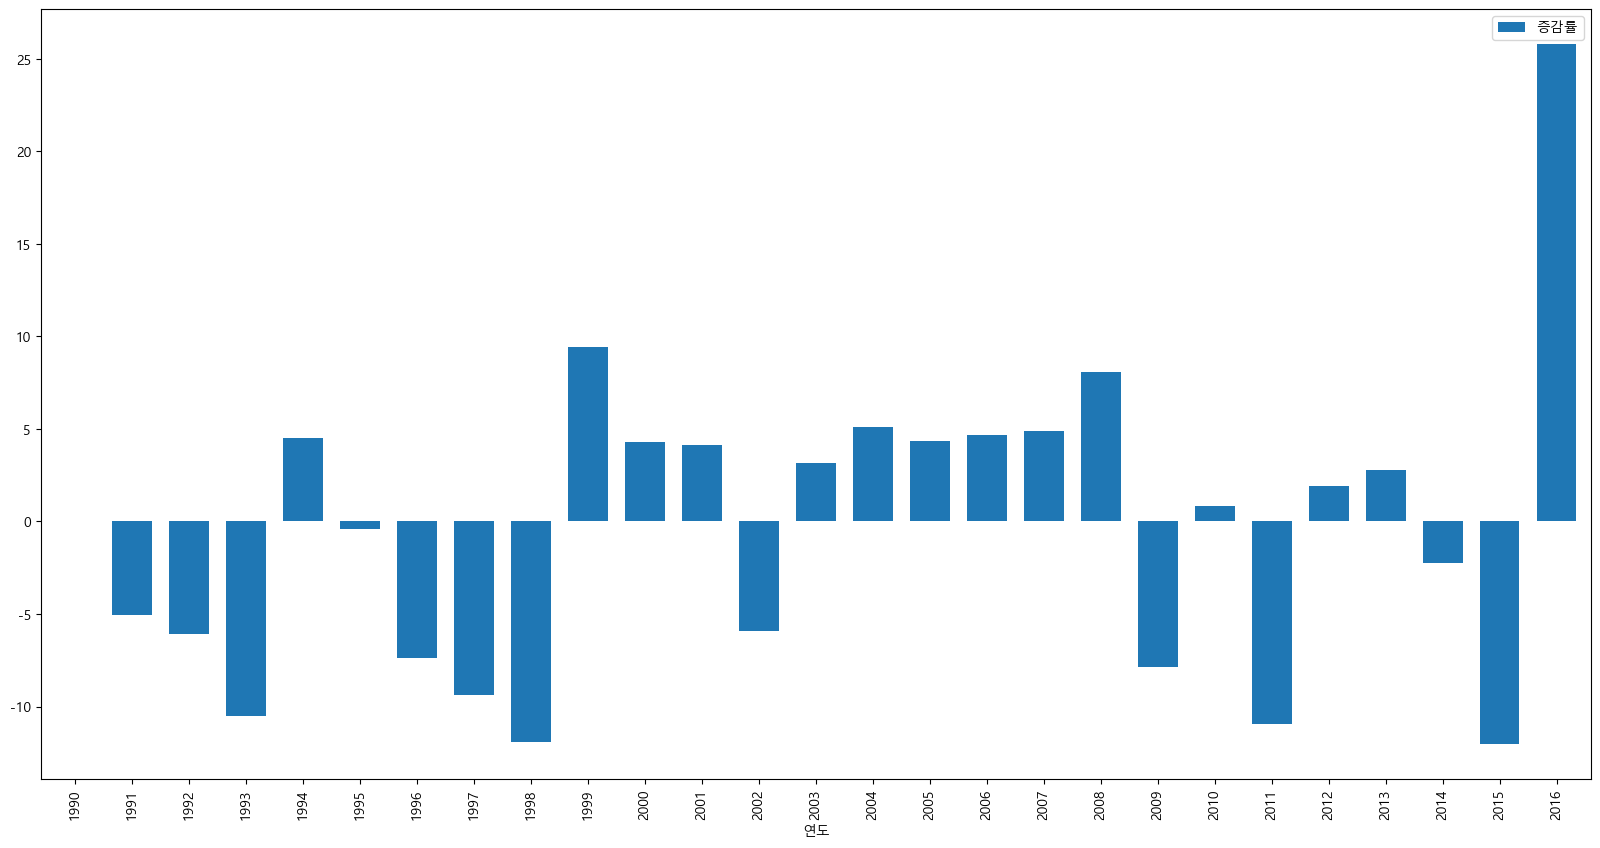

In [57]:
plt.rcParams['axes.unicode_minus'] = False  # 세로 축에 있는 마이너스 기호가 깨지지 않게 해준다.
df[['증감률']].plot(kind='bar', figsize=(20,10), width=0.7)

plt.show()

### 변동율 선 그래프
(이를 발전량 막대 그래프에 입힐 예정)

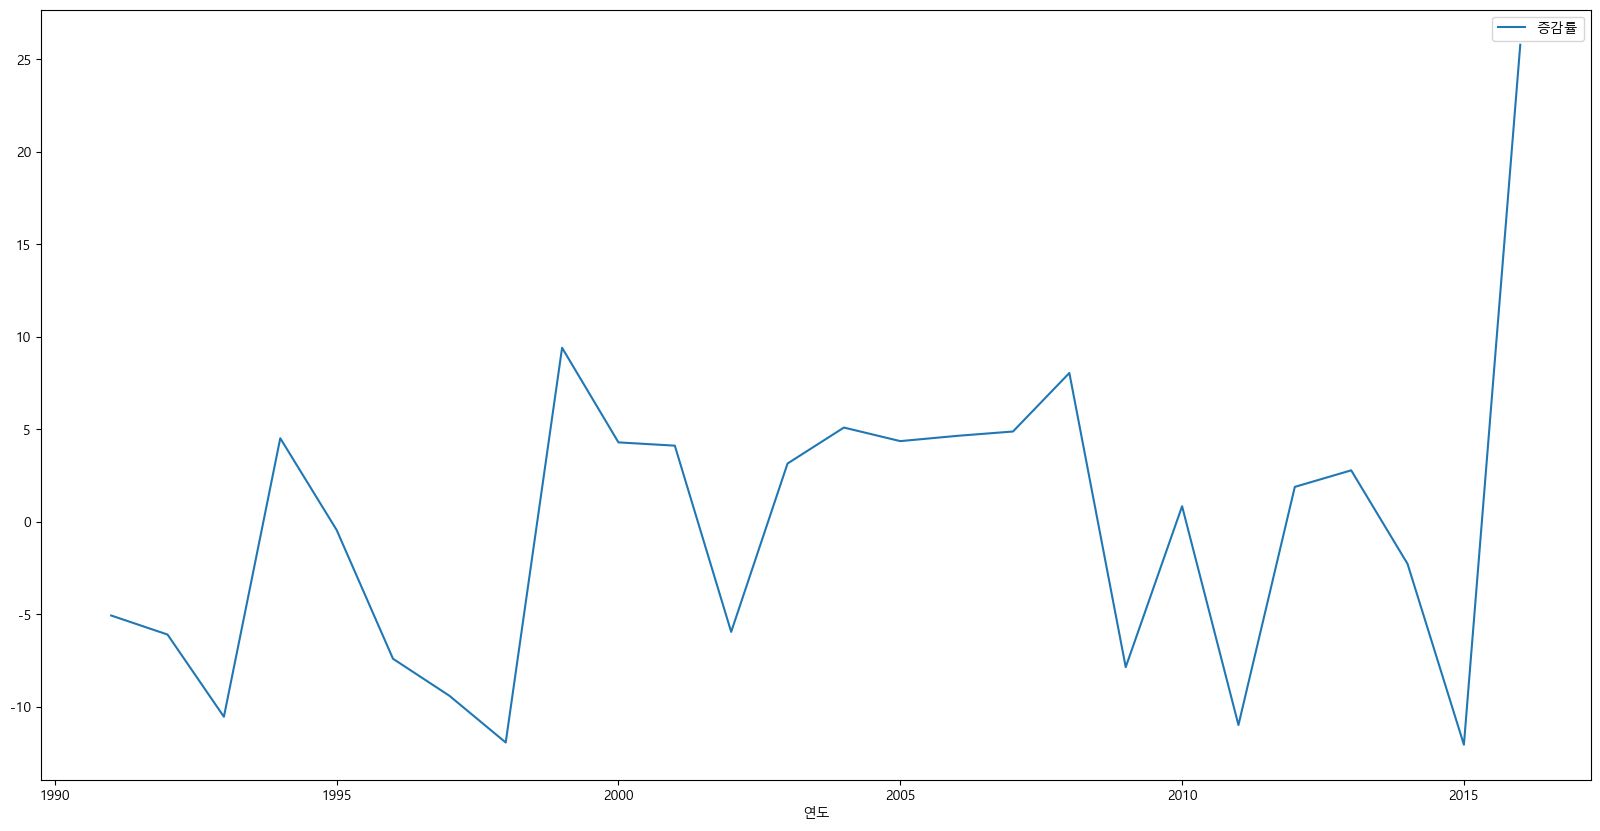

In [58]:
plt.rcParams['axes.unicode_minus'] - False
df[['증감률']].plot(figsize=(20,10))

plt.show()

### 2축 그래프 그리기 1

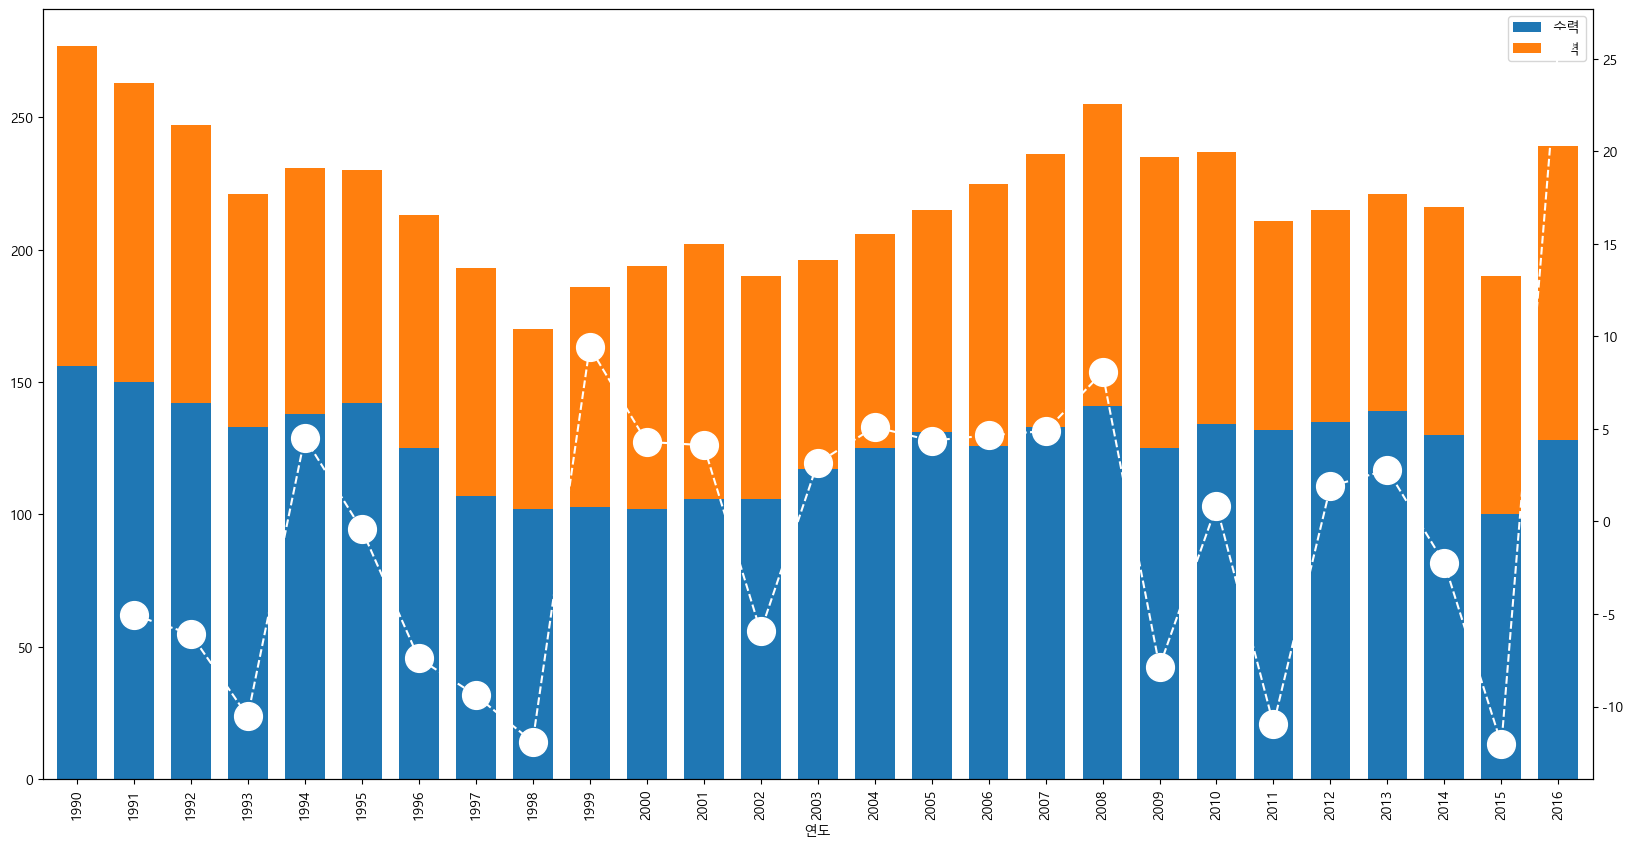

In [62]:
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20,10), width=0.7, stacked=True)

# 첫 번째 그래프의 객체를 복사
# 두 개의 y축을 갖는 그래프에서 각각 독립적인 y축을 표현하게 한다.
ax2 = ax1.twinx()

# 그 객체에 두 번째 그래프를 그린다.
# 두 그래프의 개수가 맞게 한다.
ax2.plot(range(len(df)), df.증감률, ls='--', marker='o', markersize=20, color='white')

plt.show()

- y축의 범위는 첫 번째 그래프의 범위를 갖는다.
- 객체 복사 없이 ax1에 두 번째 그래프를 바로 그리면 어떻게 되는지 확인한다.

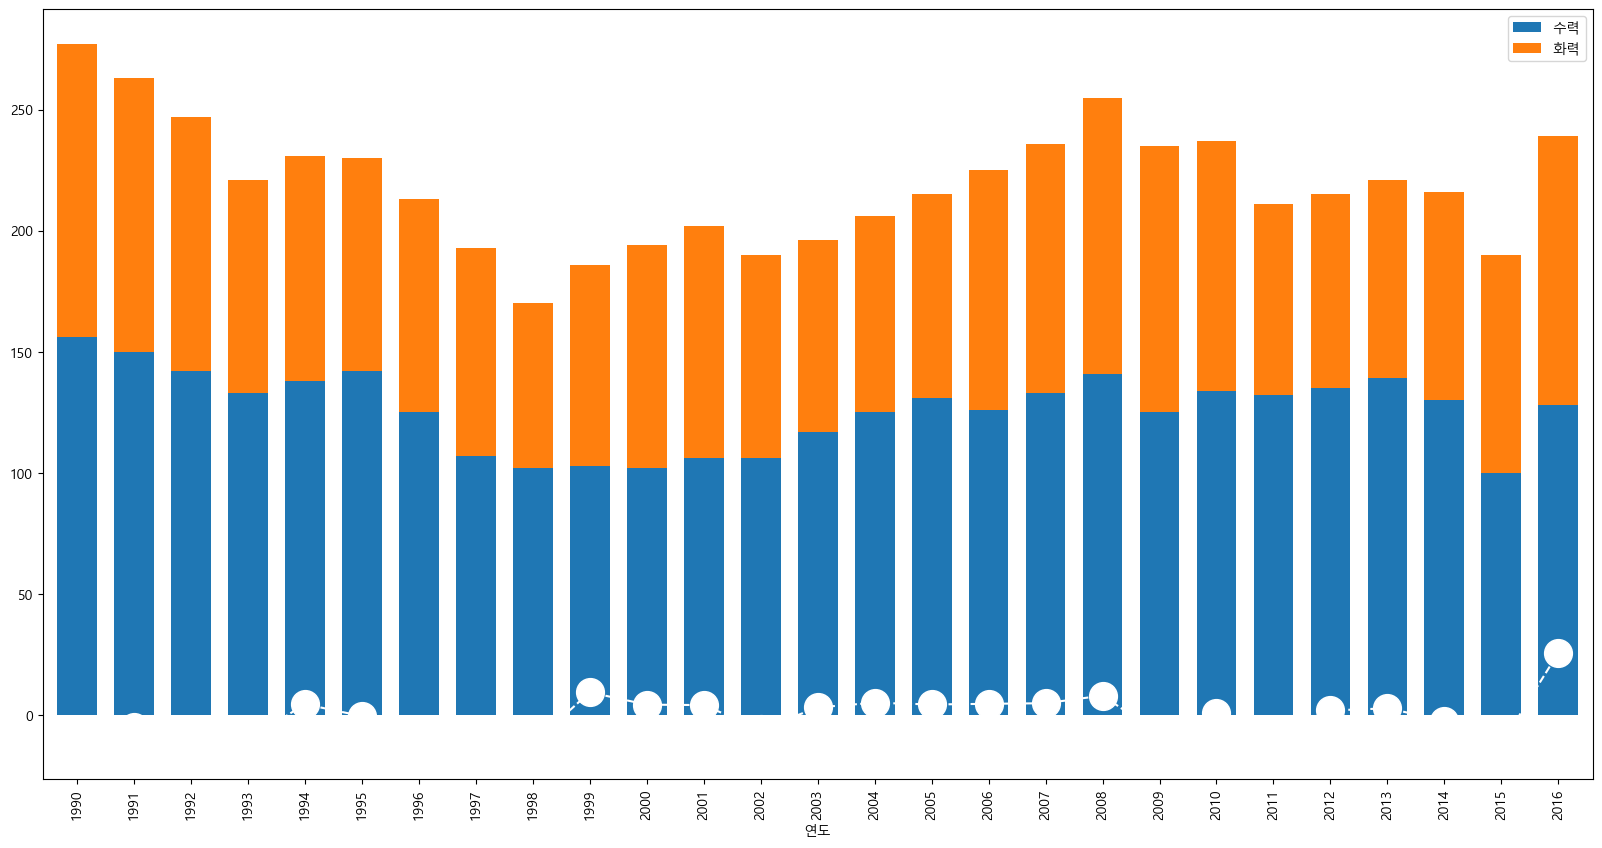

In [63]:
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20,10), width=0.7, stacked=True)

# 첫 번째 그래프의 객체를 복사
# 두 개의 y축을 갖는 그래프에서 각각 독립적인 y축을 표현하게 한다.

# 그 객체에 두 번째 그래프를 그린다.
# 두 그래프의 개수가 맞게 한다.
ax1.plot(range(len(df)), df.증감률, ls='--', marker='o', markersize=20, color='white')

plt.show()

### 2축 그래프 그리기 2
- 두 번째 그래프의 y축 범위를 조절하여 위쪽으로 뜨게 만들 수 있다.

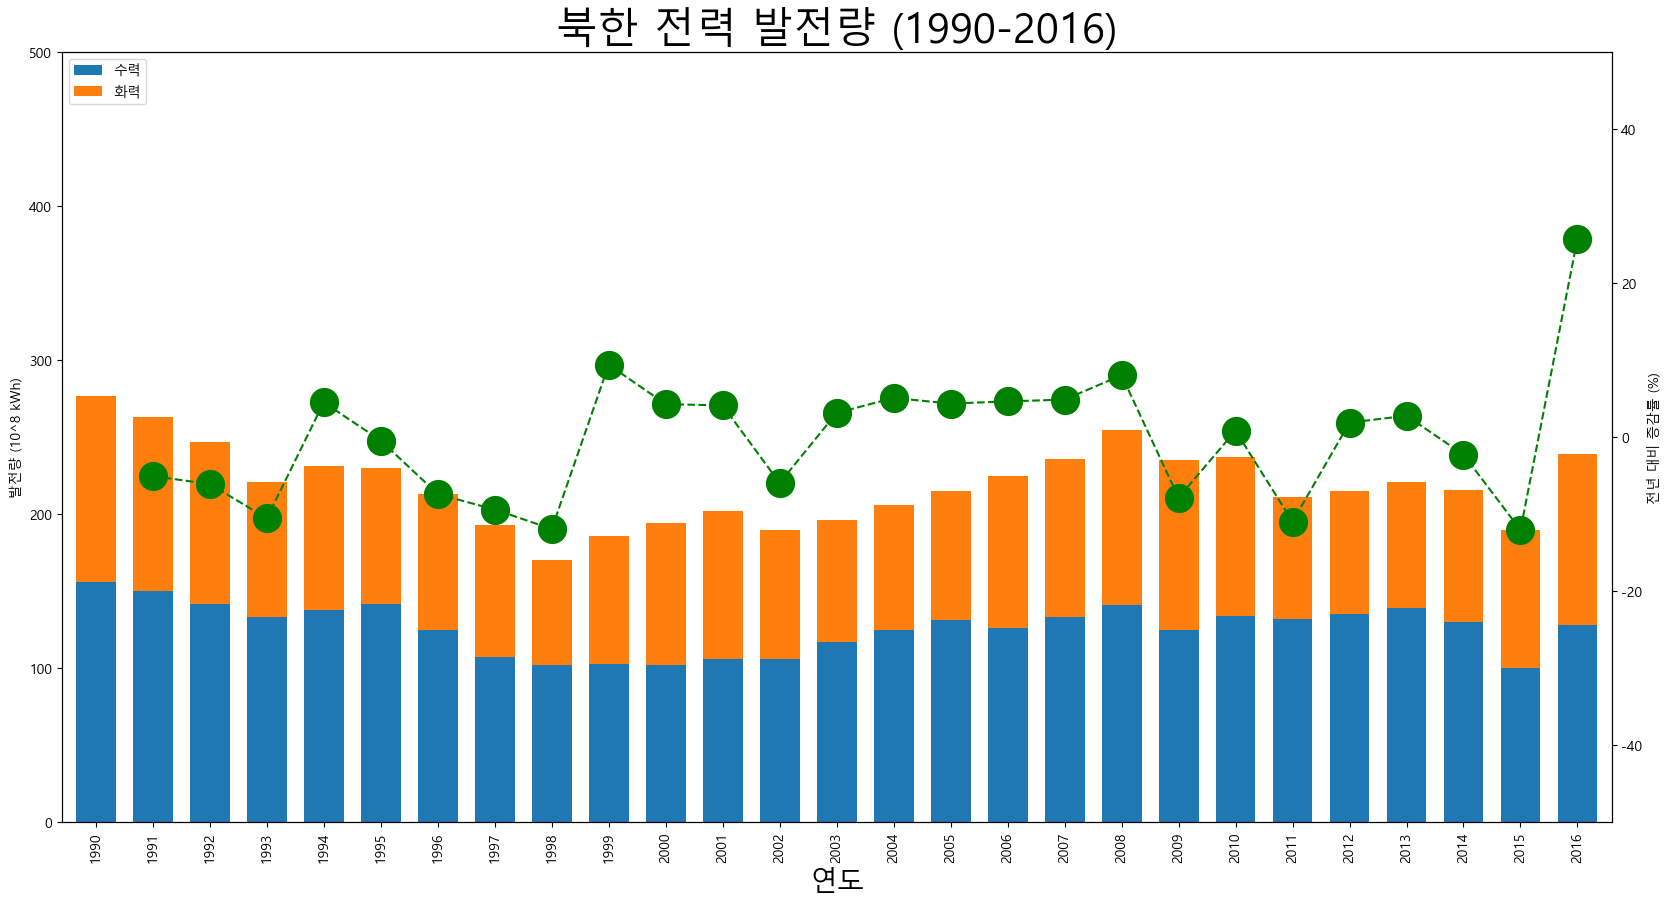

In [65]:
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20,10), width=0.7, stacked=True)

# 첫 번째 그래프의 객체를 복사
# 두 개의 y축을 갖는 그래프에서 각각 독립적인 y축을 표현하게 한다.
ax2 = ax1.twinx()

# 그 객체에 두 번째 그래프를 그린다.
# 두 그래프의 개수가 맞게 한다.
ax2.plot(range(len(df)), df.증감률, ls='--', marker='o', markersize=20, color='green')

# Y축의 범위를 조절한다.
ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량 (10^8 kWh)')
ax2.set_ylabel('전년 대비 증감률 (%)')

plt.title('북한 전력 발전량 (1990-2016)', size=30)
ax1.legend(loc='upper left')

plt.show()

## Folium
- Folium은 OpenStreetMap과 같은 지도 데이터에 위치 정보를 시각화 하기 위한 라이브러리
- 특정 지점의 위도(latitude)와 경도(longitude) 정보를 이용하여 지도에 정보를 표시한다.

Folium: https://python-visualization.github.io/folium/

OpenStreetMap: https://www.openstreetmap.org/

- 사용을 위해 필요한 것 : Folium | 지도 | 위도, 경도

- 구글 맵의 위도와 경도 정보
    - Folium을 쓰기 위해서는 위도와 경도 정보를 먼저 파악해야 한다.
    - 구글에서 '구글 맵' 또는 '구글 지도'를 검색
    - 최상단의 검색창에 원하는 지역을 입력

- 구글 맵의 위도와 경도 정보
    - 검색된 지역을 클릭하면 주소창에 위도와 경도 정보 표시
    - https://www.google.co.kr/maps/place/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EC%82%AC%EA%B4%80%ED%95%99%EA%B5%90/data=!3m1!4b1!4m6!3m5!1s0x35718d295c3770b1:0xcf8f5a2bb8f332b6!8m2!3d35.1465533!4d126.9222613!16s%2Fg%2F11rvlpr141?hl=ko&entry=ttu

참고 : 위도 경도 찾기

- 주소를 입력하면 위도, 경도를 보여주는 사이트 : http://map.esran.com

해당 지역 지도 생성
- folium 패키지 임포트
- Map 함수에 location 정보를 넣고, zoom_start 값을 적절히 입력
- 해당 위치를 중심으로 지도 생성

(PyCharm에서는 잘 안될 수 있으니 jupyter 권장.)

In [68]:
import folium

map_osm = folium.Map(location=[35.1465533, 126.9222613],
zoom_start=17)
map_osm

### 지도 스타일 변경
- tiles에 값을 입력하여 지도 스타일을 변경할 수 있음
- 한국 지도는 Stamen Toner와 Stamen Terrain, Stamen Watercolor 정도가 가능하나, 최근에는 잘 되지 않는다. (기본값 : OpenStreetMap)

In [72]:
map_osm = folium.Map(location=[35.1465533, 126.9222613],
zoom_start=17,
tiles='Stamen Watercolor'
)
map_osm

### Marker
- Marker 함수를 이용하여 지도 위에 위치를 표시할 수 있다.
- 복수의 위치를 하나의 지도에 표시하는 것도 가능하다.
- popup argument에 해당 위치의 텍스트 정보를 입력 가능하다.
- .add_to() 함수로 지도 객체에 올린다.
- 클릭 시 텍스트 정보가 표시된다.

In [73]:
map_osm = folium.Map(location=[35.1473898, 126.8798201], zoom_start=13)
folium.Marker([35.1465533, 126.9222613], popup="인공지능사관학교").add_to(map_osm)
folium.Marker([35.1473898, 126.8798201], popup="광주시 교육청").add_to(map_osm)
map_osm

### CircleMarker
- CircleMarker 함수를 이용하여 해당 위치를 원으로 표시할 수 있다.
- radius : 반지름, color : 색상, fill : 채우기

In [74]:
map_osm = folium.Map(location=[35.1473898, 126.8798201], zoom_start=13)
folium.CircleMarker([35.1465533, 126.9222613], popup="인공지능사관학교",
radius=50).add_to(map_osm)
folium.CircleMarker([35.1473898, 126.8798201], popup="광주시 교육청", radius=50,
color="red", fill=True).add_to(map_osm)
map_osm

### 방화 데이터 분석
- 서울시 소방서 관서별 방화 데이터를 지도에 표시해본다.

In [75]:
df = pd.read_csv(os.path.join(path,'fire.csv'), encoding='euc-kr')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   관서명     31 non-null     object 
 1   y2011   31 non-null     int64  
 2   y2012   31 non-null     int64  
 3   y2013   31 non-null     int64  
 4   y2014   31 non-null     int64  
 5   y2015   31 non-null     int64  
 6   y2016   31 non-null     int64  
 7   y2017   31 non-null     int64  
 8   y2018   31 non-null     int64  
 9   LAT     31 non-null     float64
 10  LON     31 non-null     float64
dtypes: float64(2), int64(8), object(1)
memory usage: 2.8+ KB


In [76]:
df.head()

,관서명,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2018,LAT,LON
0,중부서,11,4,4,7,6,6,1,10,37.564873,127.013194
1,종로서,15,4,6,4,3,12,5,1,37.572816,126.976697
2,남대문서,7,6,9,6,5,3,1,5,37.554763,126.971309
3,서대문서,13,16,14,14,13,5,10,10,37.564789,126.964587
4,혜화서,10,2,16,12,9,2,8,8,37.579640,127.006900


In [78]:
map = folium.Map(location=[37.570207, 126.967259], zoom_start=11)

for n in df.index:
    folium.CircleMarker([df.LAT[n],df.LON[n]],
                        radius= int(df.y2018[n]),
                                    popup = df.관서명[n],
                                    color='red').add_to(map)
    
map

df[‘LAT’]의 결과는 Series이며, 그 Series의 여러 요소 중 n 번째를 취함

df.loc[n, ‘LAT’]와 같은 식으로 해도 동일한 결과

In [79]:
type(df.LAT)

pandas.core.series.Series

In [81]:
map = folium.Map(location=[37.570207, 126.967259], zoom_start=11)

for n in df.index:
    folium.CircleMarker([df.LAT[n],df.LON[n]],
                        radius= int(df.y2012[n]),
                                    popup = df.관서명[n],
                                    color='blue').add_to(map)
    
for n in df.index:
    folium.CircleMarker([df.LAT[n],df.LON[n]],
                        radius= int(df.y2018[n]),
                                    popup = df.관서명[n],
                                    color='red', fill = True).add_to(map)
    
map

참고 : 구글 지오 코딩
- 구글 Geocoding 서비스는 장소나 주소를 입력하면 위도와 경도 좌표 정보를 제공한다.
- 서비스를 이용하려면 구글 지도 플랫폼에 접속 신청하여 API를 받아야 한다.
- 매월 $200 분량이 무료이다.

- 구글 지도 플랫폼 https://mapsplatform.google.com/
- 구글 맵스 패키지도 설치한다 `pip install googlemaps`

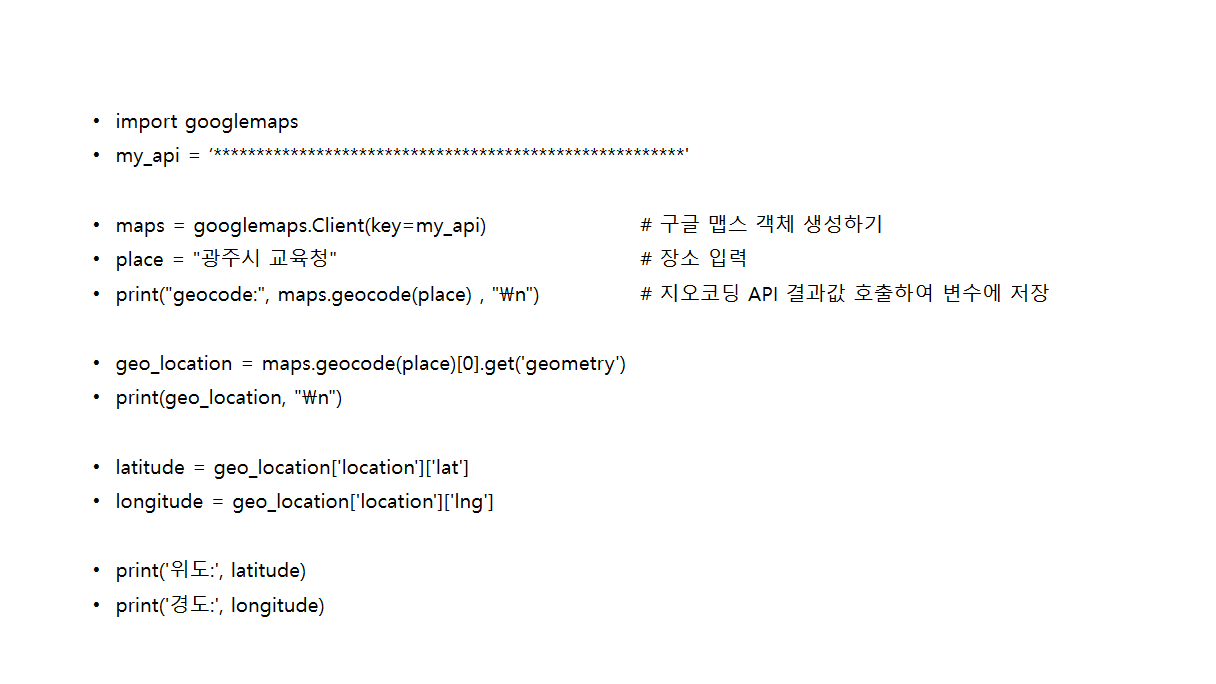
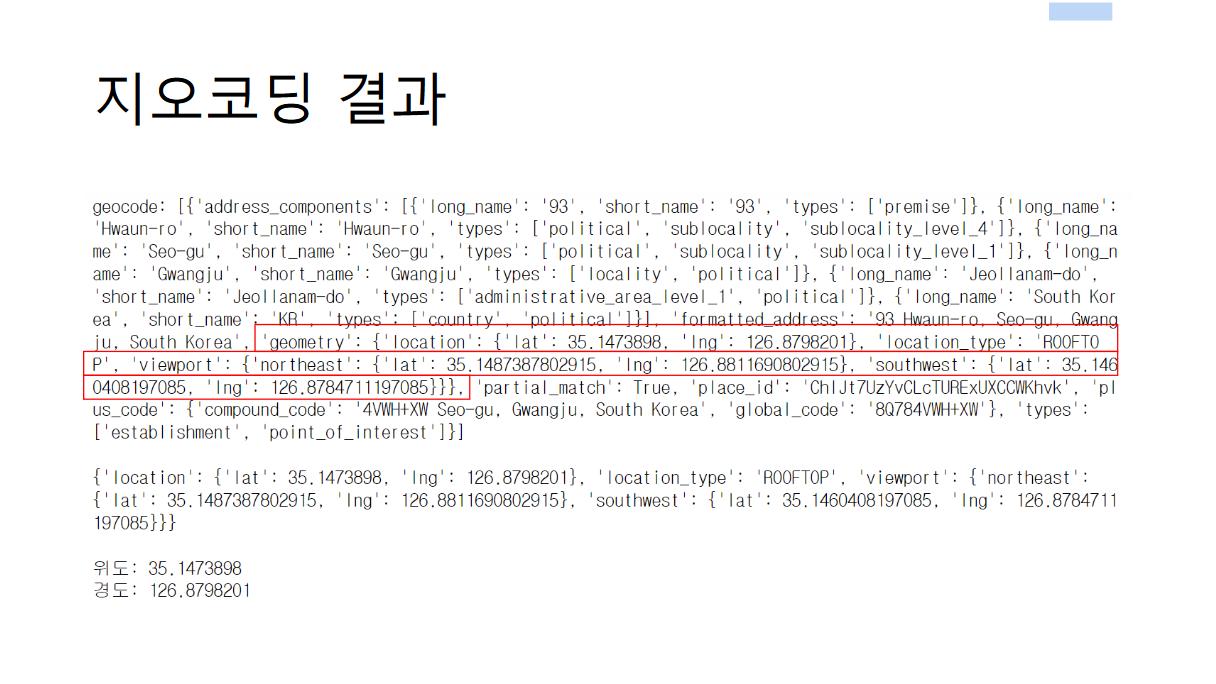
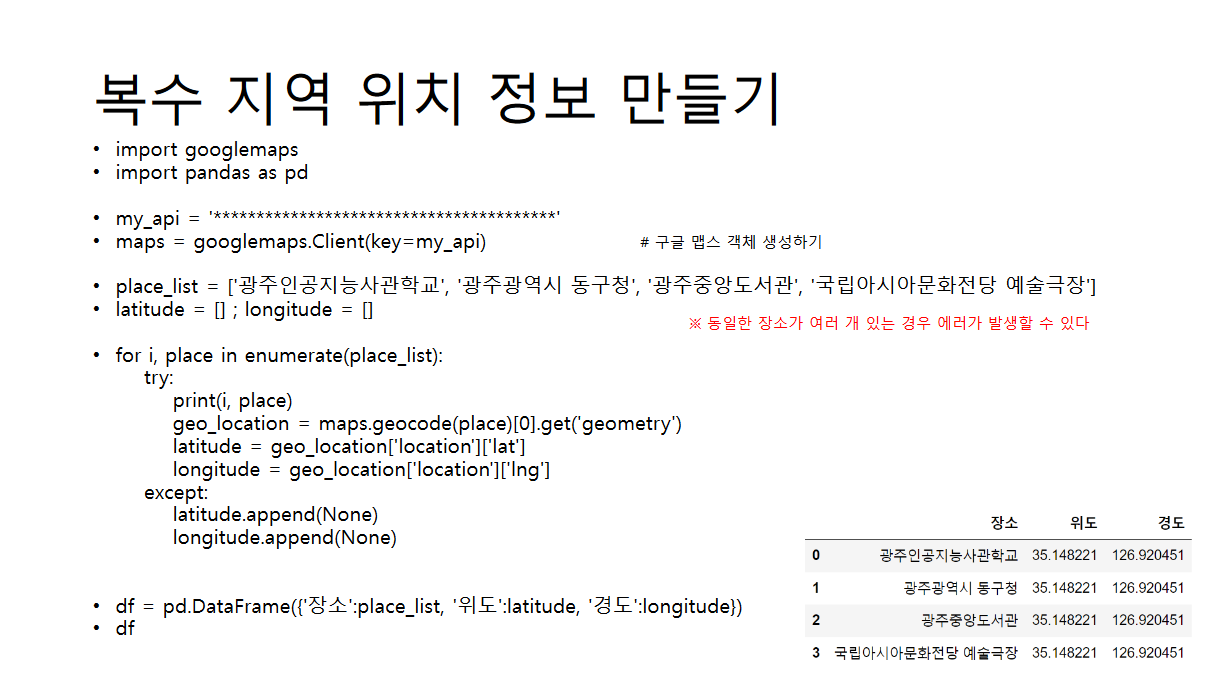